In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#import the citipy module 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ccc86899c384315fd0735dc4a85854e1


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | sao filipe
Processing Record 2 of Set 13 | sechelt
Processing Record 3 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 13 | port alfred
Processing Record 6 of Set 13 | kapaa
Processing Record 7 of Set 13 | torbay
Processing Record 8 of Set 13 | narimanov
Processing Record 9 of Set 13 | dikson
Processing Record 10 of Set 13 | pevek
Processing Record 11 of Set 13 | punta arenas
Processing Record 12 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 13 | maceio
Processing Record 14 of Set 13 | tuktoyaktuk
Processing Record 15 of Set 13 | araouane
Processing Record 16 of Set 13 | namatanai
Processing Record 17 of Set 13 | mill valley
Processing Record 18 of Set 13 | khatanga
Processing Record 19 of Set 13 | qaanaaq
Processing Record 20 of Set 13 | amderma
City not found. Skipping...
Processing Record 21 of Set 13 | hermanus
Pr

Processing Record 35 of Set 16 | cidreira
Processing Record 36 of Set 16 | vezirkopru
Processing Record 37 of Set 16 | saint george
Processing Record 38 of Set 16 | athabasca
Processing Record 39 of Set 16 | zhanaozen
Processing Record 40 of Set 16 | upernavik
Processing Record 41 of Set 16 | auki
Processing Record 42 of Set 16 | hofn
Processing Record 43 of Set 16 | katubao
Processing Record 44 of Set 16 | iqaluit
Processing Record 45 of Set 16 | ponta delgada
Processing Record 46 of Set 16 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 16 | port hardy
Processing Record 48 of Set 16 | terranuova bracciolini
Processing Record 49 of Set 16 | ribeira grande
Processing Record 50 of Set 16 | katobu
Processing Record 1 of Set 17 | kavaratti
Processing Record 2 of Set 17 | college
Processing Record 3 of Set 17 | rio bueno
Processing Record 4 of Set 17 | nokaneng
Processing Record 5 of Set 17 | talnakh
Processing Record 6 of Set 17 | tahe
Processing Record 7 of Set 17 | 

Processing Record 19 of Set 20 | baykit
Processing Record 20 of Set 20 | burica
City not found. Skipping...
Processing Record 21 of Set 20 | isangel
Processing Record 22 of Set 20 | paita
Processing Record 23 of Set 20 | sola
Processing Record 24 of Set 20 | tucuman
Processing Record 25 of Set 20 | anadyr
Processing Record 26 of Set 20 | angoram
Processing Record 27 of Set 20 | jiuquan
Processing Record 28 of Set 20 | arraial do cabo
Processing Record 29 of Set 20 | labrea
Processing Record 30 of Set 20 | lavrentiya
Processing Record 31 of Set 20 | jiaxing
Processing Record 32 of Set 20 | saint-joseph
Processing Record 33 of Set 20 | kazalinsk
City not found. Skipping...
Processing Record 34 of Set 20 | valparaiso
Processing Record 35 of Set 20 | kavieng
Processing Record 36 of Set 20 | matay
Processing Record 37 of Set 20 | boa vista
Processing Record 38 of Set 20 | nhamunda
Processing Record 39 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 40 of Set

Processing Record 2 of Set 24 | husavik
Processing Record 3 of Set 24 | eureka
Processing Record 4 of Set 24 | cadereyta
Processing Record 5 of Set 24 | constantine
Processing Record 6 of Set 24 | panzhihua
Processing Record 7 of Set 24 | kangaatsiaq
Processing Record 8 of Set 24 | gondanglegi
Processing Record 9 of Set 24 | wick
Processing Record 10 of Set 24 | adrar
Processing Record 11 of Set 24 | teeli
Processing Record 12 of Set 24 | san felipe
Processing Record 13 of Set 24 | amuntai
Processing Record 14 of Set 24 | portland
Processing Record 15 of Set 24 | bayshore gardens
Processing Record 16 of Set 24 | merauke
Processing Record 17 of Set 24 | uzumlu
City not found. Skipping...
Processing Record 18 of Set 24 | felidhoo
City not found. Skipping...
Processing Record 19 of Set 24 | mae sot
Processing Record 20 of Set 24 | skoghall
Processing Record 21 of Set 24 | niamey
Processing Record 22 of Set 24 | perundurai
Processing Record 23 of Set 24 | acapulco
Processing Record 24 of S

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,72.36,76,0,7.74,CV,2022-02-04 03:49:07
1,Sechelt,49.4664,-123.7694,44.55,97,100,4.05,CA,2022-02-04 03:49:07
2,Port Alfred,-33.5906,26.8910,69.84,75,98,15.48,ZA,2022-02-04 03:48:02
3,Kapaa,22.0752,-159.3190,75.52,67,0,1.99,US,2022-02-04 03:48:27
4,Torbay,47.6666,-52.7314,38.75,90,100,24.16,CA,2022-02-04 03:48:50
5,Narimanov,46.6927,47.8498,33.71,88,100,5.91,RU,2022-02-04 03:49:08
6,Dikson,73.5069,80.5464,-8.03,95,100,4.81,RU,2022-02-04 03:48:31
7,Pevek,69.7008,170.3133,-20.11,100,26,2.93,RU,2022-02-04 03:49:08
8,Punta Arenas,-53.1500,-70.9167,42.91,61,75,10.36,CL,2022-02-04 03:44:53
9,Maceio,-9.6658,-35.7353,76.44,88,20,2.30,BR,2022-02-04 03:48:30


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-02-04 03:49:07,14.8961,-24.4956,72.36,76,0,7.74
1,Sechelt,CA,2022-02-04 03:49:07,49.4664,-123.7694,44.55,97,100,4.05
2,Port Alfred,ZA,2022-02-04 03:48:02,-33.5906,26.8910,69.84,75,98,15.48
3,Kapaa,US,2022-02-04 03:48:27,22.0752,-159.3190,75.52,67,0,1.99
4,Torbay,CA,2022-02-04 03:48:50,47.6666,-52.7314,38.75,90,100,24.16
5,Narimanov,RU,2022-02-04 03:49:08,46.6927,47.8498,33.71,88,100,5.91
6,Dikson,RU,2022-02-04 03:48:31,73.5069,80.5464,-8.03,95,100,4.81
7,Pevek,RU,2022-02-04 03:49:08,69.7008,170.3133,-20.11,100,26,2.93
8,Punta Arenas,CL,2022-02-04 03:44:53,-53.1500,-70.9167,42.91,61,75,10.36
9,Maceio,BR,2022-02-04 03:48:30,-9.6658,-35.7353,76.44,88,20,2.30


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

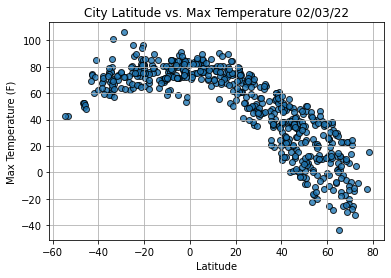

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

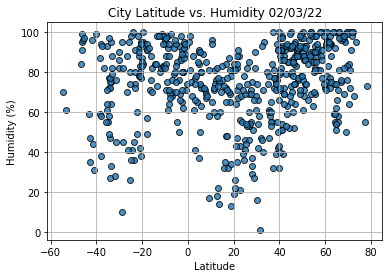

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

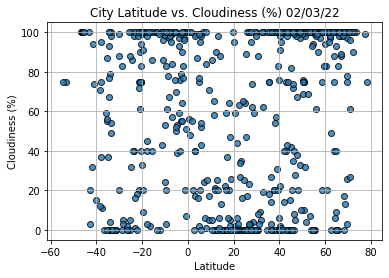

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

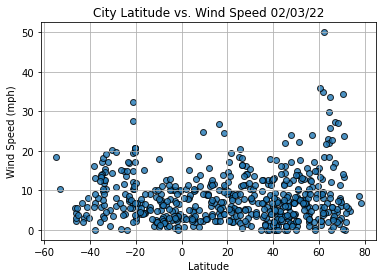

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  Mill Valley
Country                        US
Date          2022-02-04 03:49:10
Lat                        37.906
Lng                      -122.545
Max Temp                    54.27
Humidity                       77
Cloudiness                     54
Wind Speed                   1.99
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
562     True
563     True
564     True
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-02-04 03:49:07,14.8961,-24.4956,72.36,76,0,7.74
1,Sechelt,CA,2022-02-04 03:49:07,49.4664,-123.7694,44.55,97,100,4.05
3,Kapaa,US,2022-02-04 03:48:27,22.0752,-159.3190,75.52,67,0,1.99
4,Torbay,CA,2022-02-04 03:48:50,47.6666,-52.7314,38.75,90,100,24.16
5,Narimanov,RU,2022-02-04 03:49:08,46.6927,47.8498,33.71,88,100,5.91


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

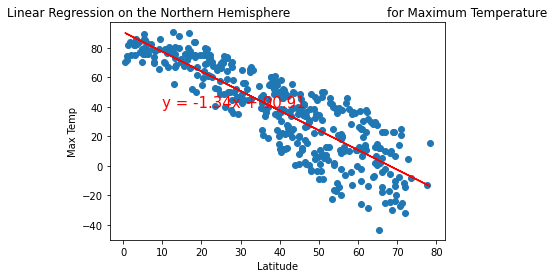

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

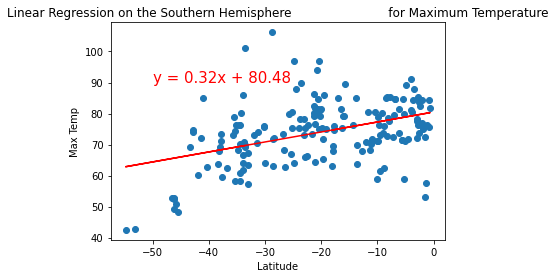

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

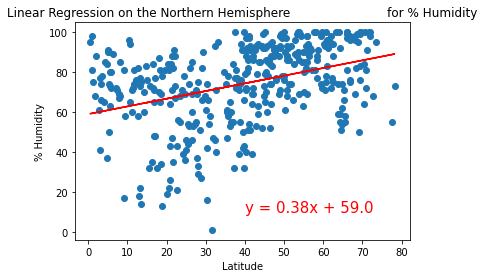

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

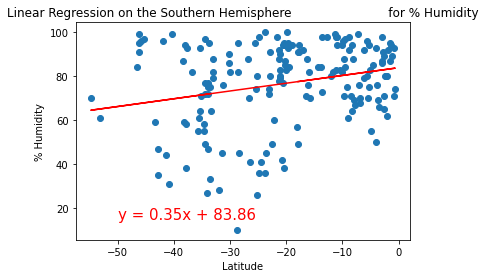

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

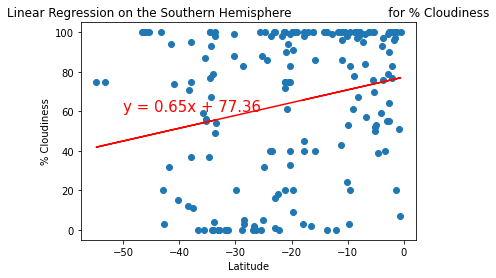

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

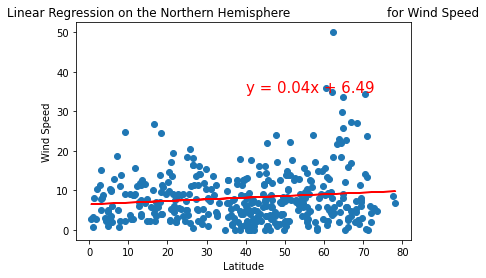

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

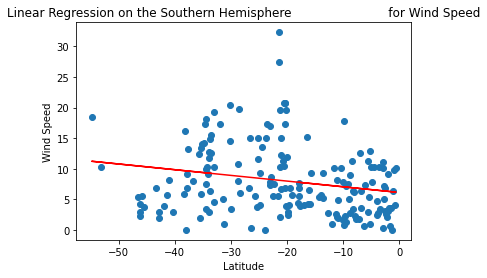

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))